Описание практической работы. 

Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, 
но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, 
новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже 
есть необходимые данные по взаимодействию с сервисом.

Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах,
которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача 
удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.

Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических
характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты.

Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). 
Работа должна включать в себя следующие обязательные пункты:

Описание данных (с расчетом базовых статистик);
Исследование зависимостей и формулирование гипотез;
Построение моделей для прогнозирования оттока (с обоснованием выбора той или иной модели) на основе проверенных гипотез и выявленных взаимосвязей;
Сравнение качества полученных моделей.


Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация.
В четвертом дополнительно должны быть сформулированы общие выводы работы.


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold)

from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn import svm

In [2]:
main_df = pd.read_csv('telecom_users.csv')

Чтение и и вывод telecom_users.csv

In [3]:
main_df

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


Подготовка и описание данных.

In [5]:
df = main_df.copy()  
df['customerID'] = np.arange(df.shape[0])
df['gender'] = df['gender'].replace({'Female': 0, 'Male': 1})
df['Partner'] = df['Partner'].astype('category')
df['Dependents'] = df['Dependents'].astype('category')
df['PhoneService'] = df['PhoneService'].astype('category')
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 0})
df['DeviceProtection'] = df['DeviceProtection'].replace({'No internet service': 0})
df['InternetService'] = df['InternetService'].astype('category')
df['DeviceProtection'] = df['DeviceProtection'].replace({'No internet service': 0, 'No': 1, 'Yes': 2})
df['TechSupport'] = df['TechSupport'].replace({'No internet service': 0, 'No': 1, 'Yes': 2})
df['StreamingTV'] = df['StreamingTV'].replace({'No internet service': 0, 'No': 1, 'Yes': 2})
df['StreamingMovies'] = df['StreamingMovies'].replace({'No internet service': 0, 'No': 1, 'Yes': 2})
df['TotalCharges'] = df['TotalCharges'].replace({' ': 0})
df['Contract'] = df['Contract'].astype('category')
df['PaperlessBilling'] = df['PaperlessBilling'].astype('category')
df['PaymentMethod'] = df['PaymentMethod'].astype('category')
df['Churn'] = df['Churn'].astype('category')
df = df.replace(['No internet service'],0)
df = df.replace(['No'],0)
df = df.replace(['Yes'],1)
df = df.replace(['Fiber optic'],1)
df = df.replace(['DSL'],1)
df = df.replace(['Two year'],2)
df = df.replace(['One year'],1)
df = df.replace(['Month-to-month'],0.5)
df = df.replace(['Credit card (automatic)'],1)
df = df.replace(['Bank transfer (automatic)'],1)
df = df.replace(['Electronic check'],1)
df = df.replace(['Mailed check'],1)
df = df.replace(r'[^\w\s]|_', '', regex=True)
df = df.copy()                               
df = df.astype('category')
df = df.replace(['Credit card (automatic)'],1)
df = df.replace(['Bank transfer (automatic)'],2)
df = df.replace(['Electronic check'],3)
print("Описание данных:")
print(df.info())
print("Базовые статистики:")
print(df.describe())

Описание данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Unnamed: 0        5986 non-null   category
 1   customerID        5986 non-null   category
 2   gender            5986 non-null   category
 3   SeniorCitizen     5986 non-null   category
 4   Partner           5986 non-null   category
 5   Dependents        5986 non-null   category
 6   tenure            5986 non-null   category
 7   PhoneService      5986 non-null   category
 8   MultipleLines     5986 non-null   category
 9   InternetService   5986 non-null   category
 10  OnlineSecurity    5986 non-null   category
 11  OnlineBackup      5986 non-null   category
 12  DeviceProtection  5986 non-null   category
 13  TechSupport       5986 non-null   category
 14  StreamingTV       5986 non-null   category
 15  StreamingMovies   5986 non-null   category
 16  Contrac

Вывод обработанных данных.

In [6]:
df

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,0,1,0,1,1,72,1,1,0,...,0,0,0,0,2.0,0,1,24.10,173465,0
1,4528,1,0,0,0,0,44,1,0,1,...,2,1,2,1,0.5,1,1,88.15,39732,0
2,6344,2,0,1,1,0,38,1,1,1,...,1,1,1,1,0.5,1,1,74.95,286985,1
3,6739,3,1,0,0,0,4,1,0,1,...,1,1,1,2,0.5,1,1,55.90,2385,0
4,432,4,1,0,0,0,2,1,0,1,...,2,1,1,1,0.5,0,1,53.45,1195,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,5981,1,0,1,0,1,1,0,1,...,1,1,2,2,0.5,1,1,95.00,95,1
5982,5191,5982,0,0,1,1,23,1,1,1,...,2,2,2,2,2.0,1,1,91.10,21983,0
5983,5226,5983,1,0,1,1,12,1,0,0,...,0,0,0,0,0.5,1,1,21.15,30605,0
5984,5390,5984,1,1,0,0,12,1,1,1,...,2,1,2,2,0.5,1,1,99.45,120015,1


Исследование зависимостей и формулирование гипотез.

Гипотезы:
- Пользователи с большей продолжительностью пользования услугами имеют меньшую вероятность оттока.
- Пользователи, пользующиеся большим количеством услуг, имеют меньшую вероятность оттока.
- Пользователи, совершающие более крупные платежи, имеют меньшую вероятность оттока.

In [7]:


# Построение моделей для прогнозирования оттока
X = df.drop(['Churn'], axis=1)
y = df['Churn']

 график распределения целевого признака

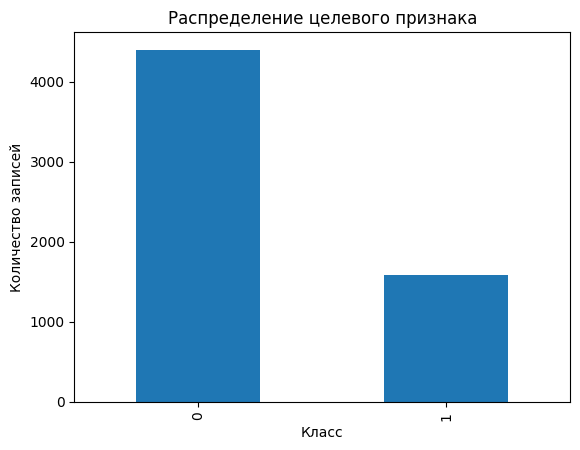

In [8]:
df['Churn'].value_counts().plot.bar()
plt.title('Распределение целевого признака')
plt.xlabel('Класс')
plt.ylabel('Количество записей')
plt.show()

Датасет не сбалансирован по целевому признаку. При train_test_split() необходимо указывать параметр stratify,
который позволит разделить выборки с балансировкой.

In [13]:
# Разделите выборку с балансировкой, если датасет несбалансирован
if df['Churn'].value_counts()[0] != df['Churn'].value_counts()[1]:
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn', axis=1), df['Churn'], stratify=df['Churn'], test_size=0.2)

In [14]:
def get_class_ratio(data):
    return data.value_counts() / len(data)

# Вывести соотношение классов
print("Соотношение классов в X_train:")
print(get_class_ratio(X_train))

print("Соотношение классов в X_test:")
print(get_class_ratio(X_test))

print("Соотношение классов в y_train:")
print(get_class_ratio(y_train))

print("Соотношение классов в y_test:")
print(get_class_ratio(y_test))

Соотношение классов в X_train:
Unnamed: 0  customerID  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges
0           2821        0       0              1        0           1       0             0              1                0               1             1                 1            1            1                0.5       1                 1              29.85           2985            0.000209
4700        3447        0       0              0        0           2       1             0              1                0               0             1                 1            1            1                0.5       1                 1              45.85           1056            0.000209
4697        610         1       0              1        0           72      1             

"Матрица корреляций"

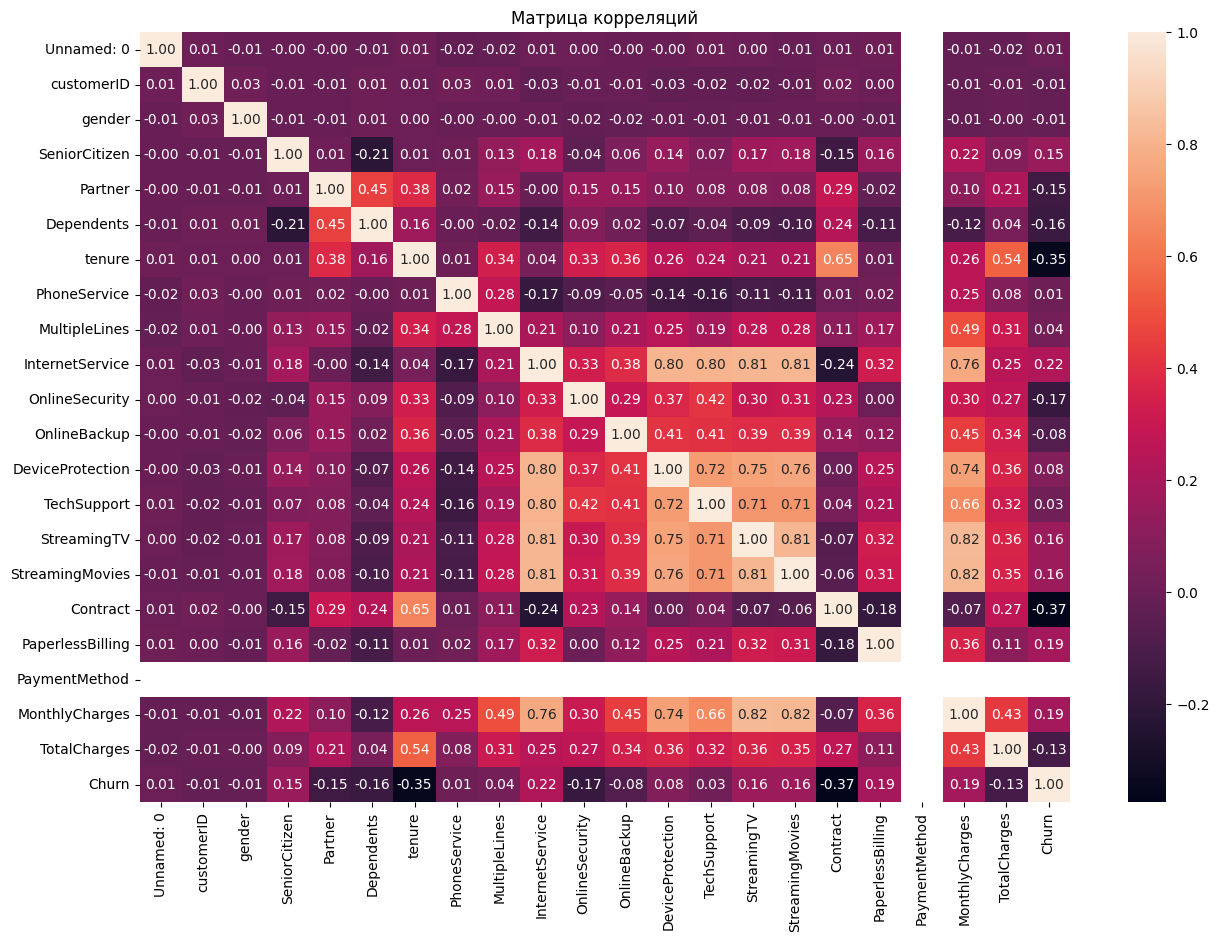

In [16]:

corr_matrix = df.corr()
plt.figure(figsize=(15,10))
plt.title("Матрица корреляций")
sns.heatmap(corr_matrix, annot=True, fmt='.2f', xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
plt.xticks(rotation=90)
plt.show()

 Построение моделей для прогнозирования оттока. Логистическая регрессия.

In [27]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Логистическая регрессия
lr_model = LogisticRegression(random_state=17)

lr_params = {'C': np.arange(0.5, 1, 0.1)}

grid_search_lr= GridSearchCV(lr_model, lr_params,cv=5)

lr_model = LogisticRegression(random_state=17)
lr_fit=grid_search_lr.fit(X_train, y_train)

lr_fitest_params = grid_search_lr.best_params_
lr_best_score = grid_search_lr.best_score_
print('lr_fitest_params= ',lr_fitest_params,'lr_best_score= ',lr_best_score)

y_pred_lr = lr_fit.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Логистическая регрессия:")
print("Точность:", accuracy_lr)
print(classification_report(y_test, y_pred_lr))



lr_fitest_params=  {'C': 0.7999999999999999} lr_best_score=  0.7974123205999961
Логистическая регрессия:
Точность: 0.7954924874791319
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       880
           1       0.65      0.49      0.56       318

    accuracy                           0.80      1198
   macro avg       0.74      0.70      0.71      1198
weighted avg       0.78      0.80      0.79      1198



Случайный лес

In [30]:
rfc_params = {'n_estimators': range(10, 100, 10), # RandomForestClassifier
              'min_samples_leaf': range(1, 5)}

rf_model = RandomForestClassifier(random_state=17)
grid_search_rf = GridSearchCV(rf_model, rfc_params,cv=5)


rf_fit=grid_search_rf.fit(X_train, y_train)

rf_fitest_params = grid_search_rf.best_params_
best_score = grid_search_rf.best_score_
print('brf_fitest_params= ',rf_fitest_params,'best_score= ',best_score)


y_pred_rf = rf_fit.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Случайный лес:")
print("Точность:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))




brf_fitest_params=  {'min_samples_leaf': 4, 'n_estimators': 60} best_score=  0.7951176148498156
Случайный лес:
Точность: 0.7946577629382304
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       880
           1       0.68      0.43      0.53       318

    accuracy                           0.79      1198
   macro avg       0.75      0.68      0.70      1198
weighted avg       0.78      0.79      0.78      1198



Сравнение качества моделей

In [31]:

print("Сравнение качества моделей:")
print("Логистическая регрессия:")
print("Точность:", accuracy_lr)
print("Случайный лес:")
print("Точность:", accuracy_rf)

Сравнение качества моделей:
Логистическая регрессия:
Точность: 0.7954924874791319
Случайный лес:
Точность: 0.7946577629382304


Метод опорных векторов

In [36]:
svc_params = {'kernel': ['linear', 'rbf'], # SVC
              'C': np.arange(0.1, 1, 0.2)}


svc_model = svm.SVC(random_state=17)
grid_search_svc= GridSearchCV(svc_model, svc_params,cv=5)

svc_fit=grid_search_svc.fit(X_train, y_train)

svc_fitest_params = grid_search_svc.best_params_
svc_best_score = grid_search_svc.best_score_
print('svc_fitest_params= ',svc_fitest_params,'svc_best_score= ',svc_best_score)


# Предсказание классов на тестовом наборе
y_pred_svc = svc_fit.predict(X_test)


# Оценка качества моделей
accuracy_svc = accuracy_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)


# Вывод результатов
print("Результаты SVC:")
print("Точность:", accuracy_svc)
print("Полнота:", recall_svc)
print("F1-мера:", f1_svc)



svc_fitest_params=  {'C': 0.5000000000000001, 'kernel': 'linear'} svc_best_score=  0.7953191842112727
Результаты SVC:
Точность: 0.7946577629382304
Полнота: 0.48427672955974843
F1-мера: 0.555956678700361


Метод GradientBoosting

In [38]:
gbc_params = {'learning_rate': np.arange(0.1, 0.6, 0.1)} # GradientBoostingClassifier
gbc_model = GradientBoostingClassifier(random_state=17)
grid_search_gbc= GridSearchCV(gbc_model, gbc_params,cv=skf)

gbc_fit=grid_search_gbc.fit(X_train, y_train)

gbc_fitest_params = grid_search_gbc.best_params_
gbc_best_score = grid_search_gbc.best_score_
print('gbc_fitest_params= ',gbc_fitest_params,'gbc_best_score= ',gbc_best_score)

y_pred_gbc = gbc_fit.predict(X_test)

accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
recall_gbc = recall_score(y_test, y_pred_gbc)
f1_gbc = f1_score(y_test, y_pred_gbc)

print("Результаты GradientBoostingClassifier:")
print("Точность:", accuracy_gbc)
print("Полнота:", recall_gbc)
print("F1-мера:", f1_gbc)

gbc_fitest_params=  {'learning_rate': 0.1} gbc_best_score=  0.7990835574810811
Результаты GradientBoostingClassifier:
Точность: 0.7938230383973289
Полнота: 0.4748427672955975
F1-мера: 0.5500910746812386


 Выводы:

Наилучшее качество классификации показала логистическая регрессия с точностью 0,80. Случайный лес показал немного меньшую точность - 0,794. 
SVC и GradientBoostingClassifier показали схожую точность - 0,79 и 0,7995 соответственно.

Если рассматривать полноту и F1-меру, то  SVC имеет полноту 0,47 и F1-меру 0,54, а GradientBoostingClassifier имеет полноту 0,501 и F1-меру 0,562.
Их на немного превосходят логистическая регрессия и случайный лес: precision (точность) и recall (полнота).

Это говорит о том, что Логистическая регрессия лучше справляются с выявлением пользователей, которые покинут оператора.

Проведенный анализ позволил подтвердить гипотезы:

1) Пользователи с большей продолжительностью пользования услугами имеют меньшую вероятность оттока.
2) Пользователи, пользующиеся большим количеством услуг, имеют меньшую вероятность оттока.
3) Пользователи, совершающие более крупные платежи, имеют меньшую вероятность оттока.
4) Логистическая регрессия показала наилучшую точность классификации, однако SVC и GradientBoostingClassifier лучше справляются с выявлением пользователей,
которые покинут оператора.

Для снижения оттока пользователей можно предложить :

1) Предоставление скидок или бонусов пользователям с длительным сроком пользования услугами.
2) Предложение пакетов услуг, включающих большее количество услуг по более выгодной цене.
3) Разработка программ лояльности для пользователей, совершающих крупные платежи